# **CV Lab 4: Chain Code**

Name: Shwetha Iyer

Batch: A4

PRN: 1032211195


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from __future__ import division
import math
from google.colab.patches import cv2_imshow

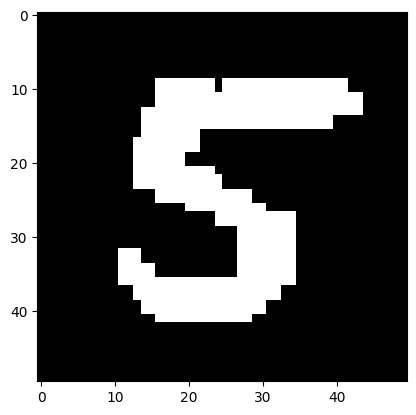

In [69]:
img = cv2.imread('/content/5.jpg',0)
img = cv2.resize(img,(50,50))
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img, cmap = 'gray')

# ***Chain-Code***

In [70]:
## Discover the starting point
for i, row in enumerate(img):
    for j, value in enumerate(row):
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

(9, 16) 255


In [71]:
directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1, # x or columns
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1, # y or rows
               0,      0,
               1,  1,  1]

In [72]:
border = []
chain = []
curr_point = start_point
for direction in directions:
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if img[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

In [73]:
count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if img[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 1000: break
    count += 1

def first_difference(chain):
    fd_list = []
    for i in range(len(chain) - 1):
        fd_list.append(abs(chain[i + 1] - chain[i]) % 8)
    return fd_list

In [74]:
print("Length:", count)
print("Chain Code:",chain)
print("First Difference:",first_difference(chain))

Length: 171
Chain Code: [3, 3, 3, 3, 3, 3, 3, 5, 4, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 4, 3, 5, 5, 7, 7, 7, 6, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 7, 6, 5, 4, 3, 3, 3, 4, 5, 4, 3, 3, 3, 5, 4, 3, 4, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 6, 5, 7, 6, 5, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 1, 0, 1, 0, 7, 1, 1, 1, 1, 3, 3, 5, 4, 3, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 0, 7, 7, 1, 0, 7, 7, 7, 0, 7, 7, 7, 1, 0, 7, 7, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1]
First Difference: [0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 6, 1, 1, 1, 7, 6, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 7, 0, 6, 1, 7, 0,

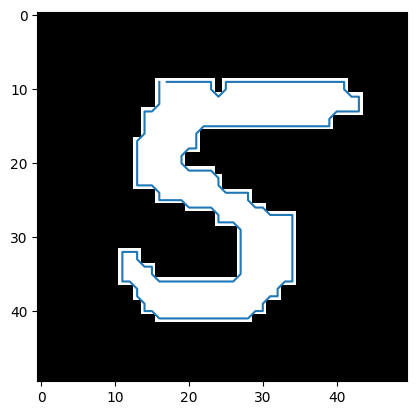

In [75]:
plt.imshow(img, cmap='gray')
plt.plot([i[1] for i in border], [i[0] for i in border])

In [76]:
#Downsampling chain-code to order 50
downsampled_chain = []
for i in range(0, len(chain), len(chain) // 50):
    downsampled_chain.append(chain[i])

print("Chain-code:", downsampled_chain)
print("First Difference:", first_difference(chain))

Chain-code: [3, 3, 3, 2, 3, 3, 3, 3, 3, 5, 5, 7, 5, 7, 7, 7, 7, 7, 6, 7, 4, 3, 4, 3, 3, 3, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 1, 0, 1, 3, 4, 4, 3, 3, 3, 1, 1, 0, 1, 7, 7, 1, 7, 1, 1, 1, 2, 1]
First Difference: [0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 6, 1, 1, 1, 7, 6, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 7, 0, 6, 1, 7, 0, 0, 7, 7, 0, 0, 6, 1, 7, 0, 6, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0]


Text(0.5, 1.0, 'Border (order 50)')

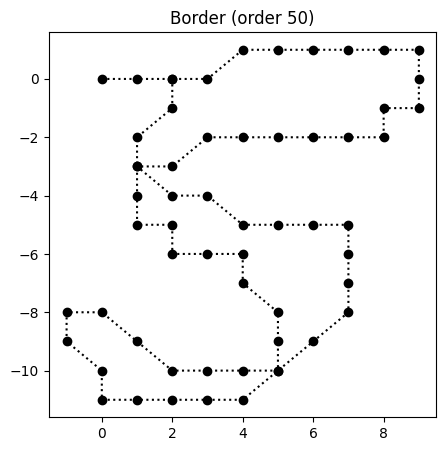

In [77]:
current_position = (0, 0)
directions = [ (-1, 1), (0, 1),(1, 1), (1, 0), (1, -1),(0, -1), (-1, -1), (-1, 0)]
boundary = [current_position]
for direction_index in downsampled_chain:
    current_position = (current_position[0] + directions[direction_index][0], current_position[1] + directions[direction_index][1])
    boundary.append(current_position)

plt.figure(figsize=(5, 5))
plt.plot(*zip(*boundary), marker='o', color='black', linestyle=':')
plt.title("Border (order 50)")

# ***Recognizing Shapes Using Chain-Code***

In [ ]:
def find_start_pos(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] == 255:
                return i, j
    return 0, 0

In [ ]:
def get_new_pos(current, direction):
    if direction == 0:
        return current[0] + 0, current[1] - 1
    elif direction == 1:
        return current[0] - 1, current[1] - 1
    elif direction == 2:
        return current[0] - 1, current[1] + 0
    elif direction == 3:
        return current[0] - 1, current[1] + 1
    elif direction == 4:
        return current[0] + 0, current[1] + 1
    elif direction == 5:
        return current[0] + 1, current[1] + 1
    elif direction == 6:
        return current[0] + 1, current[1] + 0
    else:
        return current[0] + 1, current[1] - 1

In [ ]:
def get_next_neighbor(current, prev, img):
    neighbors = [
        img[current[0] + 0][current[1] - 1],
        img[current[0] - 1][current[1] - 1],
        img[current[0] - 1][current[1] + 0],
        img[current[0] - 1][current[1] + 1],
        img[current[0] + 0][current[1] + 1],
        img[current[0] + 1][current[1] + 1],
        img[current[0] + 1][current[1] + 0],
        img[current[0] + 1][current[1] - 1]
    ]
    direction = (prev + 1) % 8
    while direction != prev:
        if neighbors[direction] == 255:
            return get_new_pos(current, direction), (direction + 4) % 8
        direction = (direction + 1) % 8
    return None, (direction + 4) % 8

In [ ]:
def first_difference(list):
    fd_list = []
    c = list[-1]
    list.insert(0, c)
    for x in range(len(list)-1):
        counter = 0
        pointer = list[x]
        while True:
            if list[x+1] == pointer:
                fd_list.append(counter)
                break
            else:
                counter += 1
                pointer = (pointer + 1) % 8
    return fd_list

In [ ]:
def boxRatio(box):
    xs = [p[0] for p in box]
    ys = [p[1] for p in box]
    xMin, xMax, yMin, yMax = min(xs), max(xs), min(ys), max(ys)
    h = yMax - yMin
    w = xMax - xMin
    ratio = float(max(h, w))/float(min(h, w))
    return ratio, h, w

In [ ]:
def shapeBox(box, sq):
    xs = [p[0] for p in box]
    ys = [p[1] for p in box]
    xMin, xMax, yMin, yMax = min(xs), max(xs), min(ys), max(ys)
    h = yMax - yMin
    w = xMax - xMin

    addedHeight = shapeAdd(h, sq)
    addedWidth = shapeAdd(w, sq)

    newBox = np.array(list(map(lambda p: [p[0] + addedWidth, p[1] + addedHeight] if (p[0] == xMax and p[1] == yMax)
                        else [p[0] + addedWidth, p[1]] if (p[0] == xMax)
                        else [p[0], p[1] + addedHeight] if (p[1] == yMax)
                        else p, box)))

    return newBox


def shapeAdd(d, sq):
    return 0 if d % sq == 0 else sq - d % sq


In [ ]:
def grid(shapeBox):
    shapeBox = list(map(list, shapeBox))
    orderedPoints = []

    if len(shapeBox) == 0:
        return orderedPoints  # Return an empty list if shapeBox is empty

    yMin = 99999
    for p in shapeBox:
        if p[1] < yMin:
            first = p
            yMin = p[1]
        elif p[1] == yMin and p[0] < first[0]:
            first = p
    orderedPoints.append(first)

    xMax = -99999
    for p in shapeBox:
        if p[0] > xMax:
            second = p
            xMax = p[0]
        elif p[0] == xMax and p[1] < second[1]:
            second = p
    orderedPoints.append(second)

    yMax = -99999
    for p in shapeBox:
        if p[1] > yMax:
            third = p
            yMax = p[1]
        elif p[1] == yMax and p[0] > third[0]:
            third = p
    orderedPoints.append(third)

    xMin = 99999
    for p in shapeBox:
        if p[0] < xMin:
            fourth = p
            xMin = p[0]
        elif p[0] == xMin and p[1] > fourth[1]:
            fourth = p
    orderedPoints.append(fourth)

    xSteps = int((orderedPoints[1][0] - orderedPoints[0][0]) / 10)
    ySteps = int((orderedPoints[3][1] - orderedPoints[0][1]) / 10)

    opposite = orderedPoints[1][0] - orderedPoints[0][0]
    close = orderedPoints[1][1] - orderedPoints[0][1]

    if close != 0:
        angle = math.atan(opposite / close)
    else:
        angle = 0

    grid = [[] for _ in range(ySteps + 1)]

    for y in range(0, ySteps + 1):
        for x in range(0, xSteps + 1):
            grid[y].append([orderedPoints[0][0] + x * 10, orderedPoints[0][1] + y * 10])

    return grid

In [ ]:
def valid_grid_points(grid_points, boundary_points):
    valid_points = []
    for i in boundary_points:
        for j in grid_points:
            if dist(i, j) <= 5 and j not in valid_points:
                valid_points.append(j)
                break
    return valid_points

In [ ]:
def get_chain_code(boundary):
    current = boundary[-1]
    chain = []
    for i in boundary:
        dx = i[0]-current[0]
        dy = i[1]-current[1]
        if dx < 0 and dy == 0:
            chain.append(0)
        if dx < 0 and dy < 0:
            chain.append(1)
        if dx == 0 and dy < 0:
            chain.append(2)
        if dx > 0 and dy < 0:
            chain.append(3)
        if dx > 0 and dy == 0:
            chain.append(4)
        if dx > 0 and dy > 0:
            chain.append(5)
        if dx == 0 and dy > 0:
            chain.append(6)
        if dx < 0 and dy > 0:
            chain.append(7)
        current = i
    return chain

In [ ]:
def cyclic_equiv(u, v):
    u_filtered = list(filter(lambda n: n != 0, u))
    v_filtered = list(filter(lambda n: n != 0, v))
    n, i, j = len(u_filtered), 0, 0
    if n != len(v_filtered):
        return False
    while i < n and j < n:
        k = 1
        while k <= n and u_filtered[(i + k) % n] == v_filtered[(j + k) % n]:
            k += 1
        if k > n:
            return True
        if u_filtered[(i + k) % n] > v_filtered[(j + k) % n]:
            i += k
        else:
            j += k
    return False

In [ ]:
def classify(diff):

    no_zeroes = filter(lambda n: n != 0, diff)

    if cyclic_equiv(no_zeroes, [2, 2, 2, 2, 2, 6]):
        return "l-shape"

    if no_zeroes == [2, 2, 2, 2]:
        firstTwo = diff.index(2)
        firstZeroes = 0
        secondZeroes = 0
        first = True
        for n in diff[firstTwo + 1:]:
            if n == 0 and first:
                firstZeroes += 1
            elif n == 0:
                secondZeroes += 1
            elif first:
                first = False
            else:
                break

        if firstZeroes == secondZeroes:
            return "square"
        else:
            return "rectangle"

    if cyclic_equiv(no_zeroes, [2, 3, 3]):
        return "triangle"

    counter = 0
    edges = 0
    for n in diff:
        if n > 4:
            counter -= (8 - n)
        else:
            counter += n
        if counter > 3 * (edges + 1):
            edges += 1
    if edges == 3:
        return "triangle"

    return diff

In [ ]:
def circular_distance_tracing(centroid, boundary):
    distance_list = []
    for i in boundary:
        distance_list.append(dist(centroid, i))
    return distance_list


def shape_detection(distance_list):
    avarage_dist = sum(distance_list)/len(distance_list)

In [ ]:
user_input = int(input("1) triangle\n2) rectangle\n3) ellipse\n4) L-shape\n"))
image_src = ""
if user_input == 1:
    image_src = 'triangle5.png'
elif user_input == 2:
    image_src = 'rectangle2.png'
elif user_input == 3:
    image_src = 'ellipse.png'
else:
    image_src = 'lshape.png'
image = cv2.imread(image_src, 0)

(thresh, im_bw) = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = 127
binary_img = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)[1]

# extracting boundary points & chain code through Moore-Neighbor algorithm
boundary_points, chain_code = boundary_and_chain(binary_img)

#making new binary image from boundary points
boundary_img = np.zeros(image.shape, np.uint8)
for i in boundary_points:
    boundary_img[i[0]][i[1]] = 255

# subsample of boundary points
subsample = subsample_set(boundary_points)
subsample_img = np.zeros(image.shape, np.uint8)
for i in subsample:
    subsample_img[i[0]][i[1]] = 255


1) triangle
2) rectangle
3) ellipse
4) L-shape
4
Length of Boundary: 927


In [ ]:
temp = []
for i in boundary_points:
    temp.append((i[1], i[0]))
numpy_boundary = np.array(temp)

rect = cv2.minAreaRect(numpy_boundary)
box = cv2.boxPoints(rect)
box = np.intp(box)
cv2.drawContours(boundary_img, [shapeBox(box, 10)], 0, (255, 0, 0), 1)

# eccentricity
box_ratio = boxRatio(box)
g = grid(shapeBox(box, 10))
flat_g = [item for sublist in g for item in sublist]
v = valid_grid_points(flat_g, temp)
chain = get_chain_code(v)
f_diff = first_difference(chain)

Text(0.5, 1.0, 'Subsampled Image')

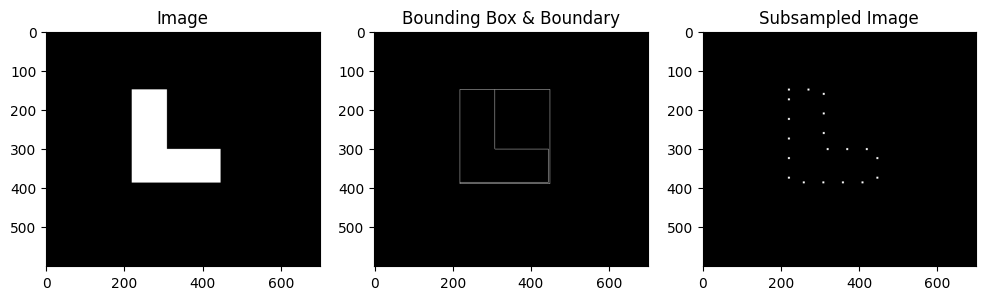

In [ ]:
f, ax = plt.subplots(1,3, figsize=(12,6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Image")
ax[1].imshow(boundary_img, cmap='gray')
ax[1].set_title("Bounding Box & Boundary")

subsample_img = cv2.dilate(subsample_img, np.ones((5, 5), np.uint8))
ax[2].imshow(subsample_img, cmap='gray')
ax[2].set_title("Subsampled Image")

In [ ]:
print("Chain Code:",chain)
print("First Difference:",f_diff)
print("Predicted Class:", classify(f_diff))

histogram = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}
for i in chain_code:
    histogram[i] += 1
print("Histogram:",histogram)

for p in v:
    cv2.circle(boundary_img, (p[0], p[1]), 3, (255, 0, 255), -1)

Chain Code: [2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
First Difference: [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted Class: l-shape
Histogram: {0: 226, 1: 0, 2: 237, 3: 0, 4: 226, 5: 1, 6: 236, 7: 0}


# *References:*

https://github.com/folkestad/Recognize-Simple-Shapes-OpenCV/blob/master/chaincode.py

https://www.kaggle.com/code/mburger/freeman-chain-code-script/script